In [1]:
# Import the dependencies.
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy
import requests
from config import weather_api_key
import time
from datetime import datetime

In [2]:

url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [3]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [4]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [5]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

-63.78523936528882 -52.26701302047722
-20.40191313347013 -149.6613000893592
-16.520321173700893 169.44367180469868
83.01156256277909 -138.81644182282974
71.14531880950702 160.9374037863301
-49.89624790364811 178.79818274453038
-4.0151021274198655 -61.00446475604278
-8.604071788155608 -57.79166860094432
7.779260863780223 -155.92015097964634
-43.88762044246219 -110.30182639689986
77.59731461918028 -174.95745420833876
-4.368678912211209 9.535745849128006
73.3205998036731 162.07519500174539
16.454970661893682 -166.18686369111242
-55.45513163827815 117.967358696926
-10.957657032368147 97.01849750087734
-74.20713314559472 68.9200222653854
-57.92446333280708 -171.65455869794883
11.855176225429815 3.4316541198227526
-24.977793834129898 124.84911763869565
-69.89399523479841 130.36070698199558
-21.745657025245634 56.45979754383703
-54.08927643493601 57.34393359355798
59.384579280243884 100.73504272973508
-59.075760045674016 127.12513236578616
-82.51016149320894 61.39848857368159
-44.554798052942

-64.97542120946427 -144.9232370895743
-32.424564700692834 -106.85216244683775
49.278761320296184 -137.1732901155294
51.07899273822267 33.614380942299704
67.13493577155211 79.78533639836752
-81.16593982511169 -127.10522706124388
27.1277128357995 -149.62680167388305
60.30689365181527 54.42993237229743
-31.113936628812716 66.47938640095589
50.03045578701904 39.144590840328505
30.421582348953393 -60.417347547010536
67.35854843264215 -134.08592269885838
50.245451066740316 77.69963897587388
-89.4018051551573 89.45892792755103
-56.66829983749963 -24.23695172368008
-12.329950566406538 -98.77750843688706
81.15379042916928 -83.47668683063831
44.37567230604117 63.802092128555415
-3.06919348379742 126.1535049154117
57.07875703294263 -112.09626548099786
-85.29356445198268 -21.422359031198226
-0.7041436918626687 52.85789873638143
41.46566400375181 -76.92518748279045
37.72381155509386 -171.7465463090786
-70.33494679418256 26.7670153505982
38.284886401120644 28.972026984776164
-59.25923252331641 -128.

In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

599

In [7]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1

# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | ushuaia
Processing Record 2 of Set 1 | teahupoo
Processing Record 3 of Set 1 | vila
Processing Record 4 of Set 1 | tuktoyaktuk
Processing Record 5 of Set 1 | cherskiy
Processing Record 6 of Set 1 | christchurch
Processing Record 7 of Set 1 | anori
Processing Record 8 of Set 1 | alta floresta
Processing Record 9 of Set 1 | hilo
Processing Record 10 of Set 1 | rikitea
Processing Record 11 of Set 1 | mys shmidta
City not found. Skipping...
Processing Record 12 of Set 1 | mayumba
Processing Record 13 of Set 1 | kapaa
Processing Record 14 of Set 1 | albany
Processing Record 15 of Set 1 | bengkulu
Processing Record 16 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 17 of Set 1 | vaini
Processing Record 18 of Set 1 | gaya
Processing Record 19 of Set 1 | yulara
Processing Record 20 of Set 1 | new norfolk
Processing Record 21 of Set 1 | saint-philippe
Processing Record 22 of Set 1 | kod

Processing Record 38 of Set 4 | tayoltita
Processing Record 39 of Set 4 | baie-comeau
Processing Record 40 of Set 4 | oschersleben
Processing Record 41 of Set 4 | tsiroanomandidy
Processing Record 42 of Set 4 | aklavik
Processing Record 43 of Set 4 | petauke
Processing Record 44 of Set 4 | carnarvon
Processing Record 45 of Set 4 | amazar
Processing Record 46 of Set 4 | solovetskiy
City not found. Skipping...
Processing Record 47 of Set 4 | itarema
Processing Record 48 of Set 4 | stromness
Processing Record 49 of Set 4 | udachnyy
Processing Record 50 of Set 4 | macapa
Processing Record 1 of Set 5 | san juan
Processing Record 2 of Set 5 | progreso
Processing Record 3 of Set 5 | port alfred
Processing Record 4 of Set 5 | shelburne
Processing Record 5 of Set 5 | arlit
Processing Record 6 of Set 5 | yar-sale
Processing Record 7 of Set 5 | kandrian
Processing Record 8 of Set 5 | aswan
Processing Record 9 of Set 5 | yokadouma
Processing Record 10 of Set 5 | san jeronimo
Processing Record 11 o

Processing Record 34 of Set 8 | jaumave
Processing Record 35 of Set 8 | zverinogolovskoye
Processing Record 36 of Set 8 | topeka
Processing Record 37 of Set 8 | megion
Processing Record 38 of Set 8 | sullana
Processing Record 39 of Set 8 | tabou
Processing Record 40 of Set 8 | vitim
Processing Record 41 of Set 8 | havre-saint-pierre
Processing Record 42 of Set 8 | washougal
Processing Record 43 of Set 8 | lagos
Processing Record 44 of Set 8 | buin
Processing Record 45 of Set 8 | san alejo
Processing Record 46 of Set 8 | vestmannaeyjar
Processing Record 47 of Set 8 | saquarema
Processing Record 48 of Set 8 | the pas
Processing Record 49 of Set 8 | meyungs
City not found. Skipping...
Processing Record 50 of Set 8 | westport
Processing Record 1 of Set 9 | calvinia
Processing Record 2 of Set 9 | gannan
Processing Record 3 of Set 9 | san carlos
Processing Record 4 of Set 9 | bandipur
Processing Record 5 of Set 9 | berlevag
Processing Record 6 of Set 9 | bara
Processing Record 7 of Set 9 | s

Processing Record 25 of Set 12 | jingdezhen
Processing Record 26 of Set 12 | tamiahua
Processing Record 27 of Set 12 | manggar
Processing Record 28 of Set 12 | palmer
Processing Record 29 of Set 12 | george town
Processing Record 30 of Set 12 | pumiao
Processing Record 31 of Set 12 | stoyba
City not found. Skipping...
Processing Record 32 of Set 12 | lilongwe
Processing Record 33 of Set 12 | botshabelo
Processing Record 34 of Set 12 | abaete
Processing Record 35 of Set 12 | halifax
Processing Record 36 of Set 12 | kaitangata
Processing Record 37 of Set 12 | dubbo
Processing Record 38 of Set 12 | mashivka
Processing Record 39 of Set 12 | naze
Processing Record 40 of Set 12 | hollins
Processing Record 41 of Set 12 | sao filipe
Processing Record 42 of Set 12 | karaul
City not found. Skipping...
Processing Record 43 of Set 12 | oksfjord
Processing Record 44 of Set 12 | neijiang
Processing Record 45 of Set 12 | liverpool
Processing Record 46 of Set 12 | barcelona
Processing Record 47 of Set

In [8]:
len(city_data)

560

In [9]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Ushuaia,-54.8000,-68.3000,47.86,43,75,9.22,AR,2022-09-20 21:26:11
1,Teahupoo,-17.8333,-149.2667,75.16,75,78,17.87,PF,2022-09-20 21:26:27
2,Vila,42.0304,-8.1588,62.71,73,87,2.33,PT,2022-09-20 21:26:28
3,Tuktoyaktuk,69.4541,-133.0374,44.60,93,100,8.05,CA,2022-09-20 21:21:40
4,Cherskiy,68.7500,161.3000,38.30,63,100,15.99,RU,2022-09-20 21:26:28
5,Christchurch,-43.5333,172.6333,52.92,85,100,10.36,NZ,2022-09-20 21:25:13
6,Anori,-3.7728,-61.6442,91.67,37,94,4.74,BR,2022-09-20 21:26:29
7,Alta Floresta,-9.8756,-56.0861,88.34,44,59,3.94,BR,2022-09-20 21:26:29
8,Hilo,19.7297,-155.0900,84.27,60,20,5.99,US,2022-09-20 21:26:30
9,Rikitea,-23.1203,-134.9692,73.15,77,0,16.04,PF,2022-09-20 21:23:13


In [12]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Ushuaia,AR,2022-09-20 21:26:11,-54.8000,-68.3000,47.86,43,75,9.22
1,Teahupoo,PF,2022-09-20 21:26:27,-17.8333,-149.2667,75.16,75,78,17.87
2,Vila,PT,2022-09-20 21:26:28,42.0304,-8.1588,62.71,73,87,2.33
3,Tuktoyaktuk,CA,2022-09-20 21:21:40,69.4541,-133.0374,44.60,93,100,8.05
4,Cherskiy,RU,2022-09-20 21:26:28,68.7500,161.3000,38.30,63,100,15.99


In [13]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [14]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

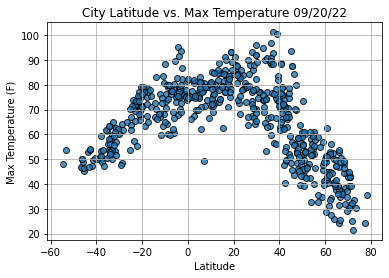

In [16]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

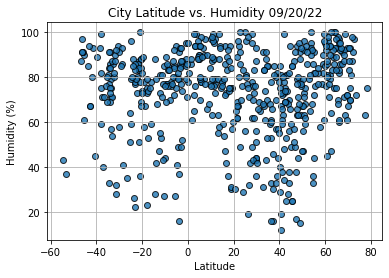

In [17]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

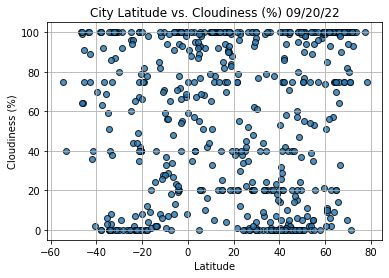

In [18]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

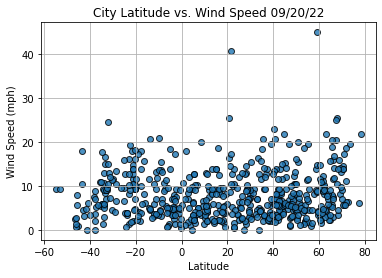

In [19]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [22]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [24]:
index13 = city_data_df.loc[13]
index13

City                     Bengkulu
Country                        ID
Date          2022-09-20 21:26:31
Lat                       -3.8004
Lng                      102.2655
Max Temp                    74.82
Humidity                       91
Cloudiness                    100
Wind Speed                   5.01
Name: 13, dtype: object

In [26]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
2,Vila,PT,2022-09-20 21:26:28,42.0304,-8.1588,62.71,73,87,2.33
3,Tuktoyaktuk,CA,2022-09-20 21:21:40,69.4541,-133.0374,44.60,93,100,8.05
4,Cherskiy,RU,2022-09-20 21:26:28,68.7500,161.3000,38.30,63,100,15.99
8,Hilo,US,2022-09-20 21:26:30,19.7297,-155.0900,84.27,60,20,5.99
11,Kapaa,US,2022-09-20 21:26:31,22.0752,-159.3190,84.52,67,20,12.66


In [27]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

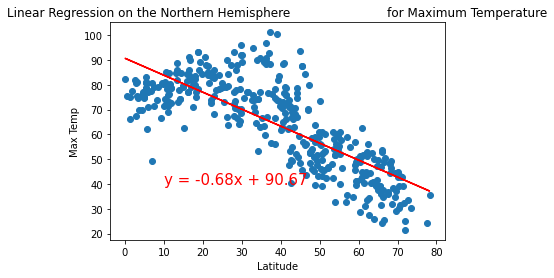

In [28]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

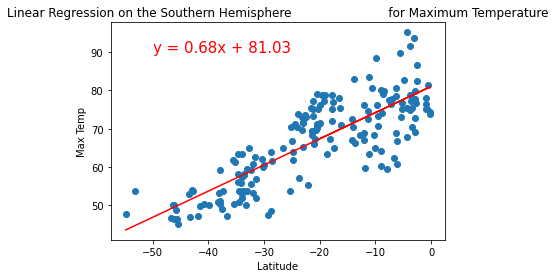

In [29]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

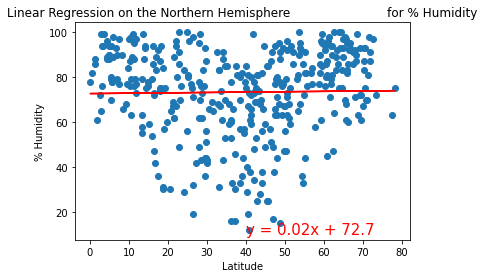

In [33]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

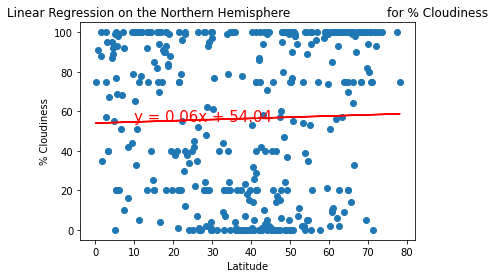

In [44]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(10,55))

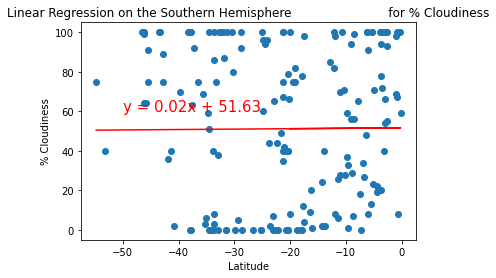

In [45]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

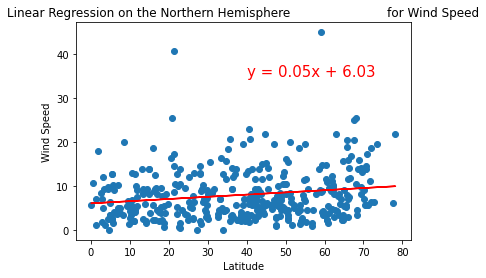

In [46]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

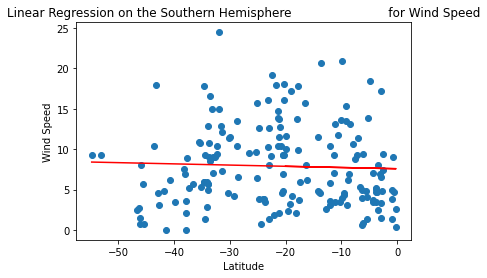

In [47]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))